In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
trainData = pd.read_csv('data\TrainingDataBinary.csv', sep=',')

In [17]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(17)
memory usage: 5.9 MB


In [18]:
trainData.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y = trainData['marker']
y.value_counts()

0    3000
1    3000
Name: marker, dtype: int64

In [20]:
X = trainData.drop('marker',axis=1)
X.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [21]:
pca = PCA()
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1)

param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60, 75, 90, 105, 120],
    "logistic__C": np.logspace(-1, 1, 1),
}

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

In [22]:
search = GridSearchCV(pipe, param_grid, n_jobs=2,cv=5)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.856):
{'logistic__C': 0.1, 'pca__n_components': 75}


In [23]:
pca.fit(X)
results = pd.DataFrame(search.cv_results_)
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.089745      0.013029         0.006689        0.002449   
1       0.127560      0.017697         0.006351        0.001793   
2       0.445645      0.048741         0.005155        0.000294   
3       1.030314      0.211467         0.006208        0.000456   
4       1.815231      0.280416         0.005338        0.001581   
5       0.975267      0.102311         0.006271        0.000542   
6       1.083224      0.087903         0.006783        0.000104   
7       1.209550      0.150111         0.012386        0.011625   
8       1.364703      0.173904         0.006546        0.000848   

  param_logistic__C param_pca__n_components  \
0               0.1                       5   
1               0.1                      15   
2               0.1                      30   
3               0.1                      45   
4               0.1                      60   
5               0.1                      75   


C:\Users\yingz\AppData\Local\Temp\ipykernel_3544\3663611340.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  best_clfs = results.groupby(components_col).apply(


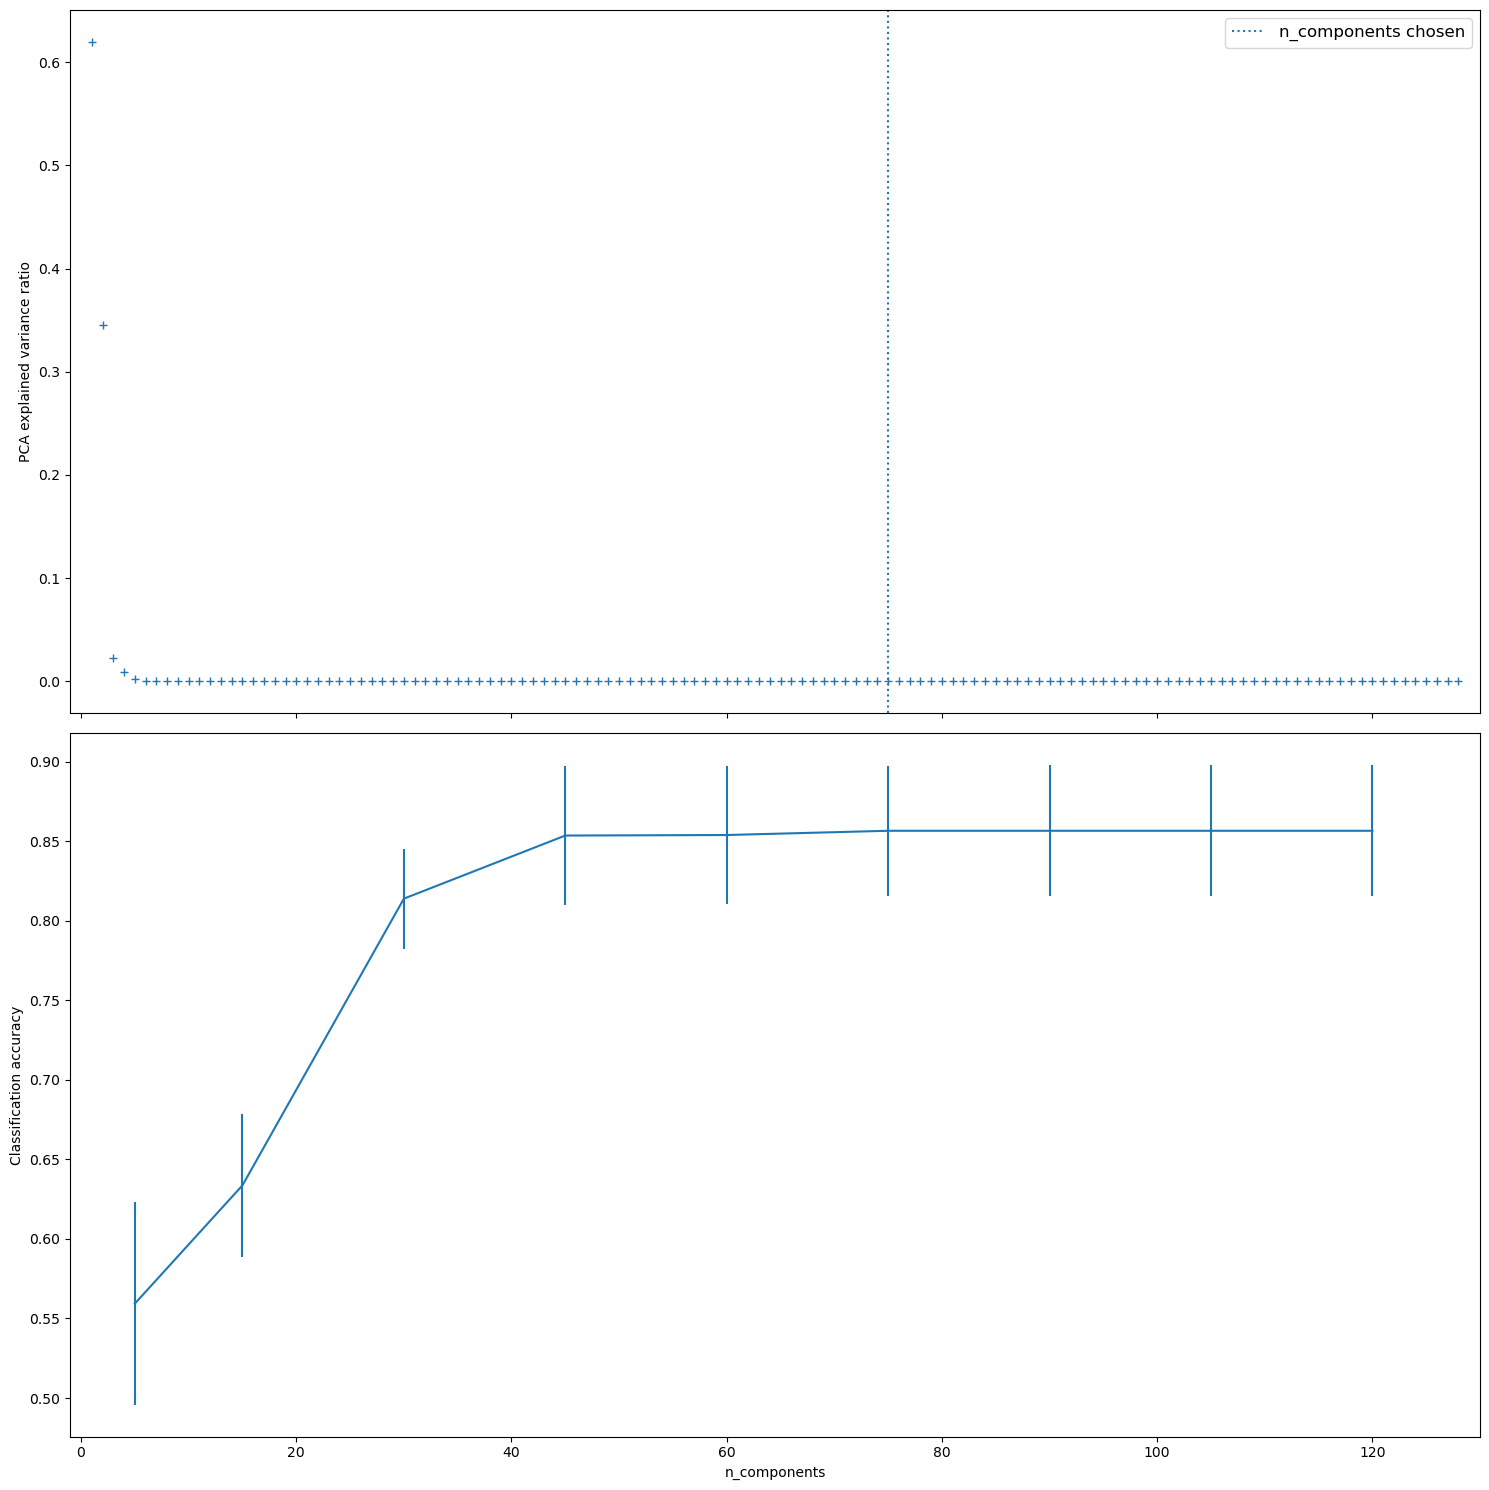

In [24]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(15, 15))
ax0.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2)
ax0.set_ylabel("PCA explained variance ratio")
ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy")
ax1.set_xlabel("n_components")

plt.xlim(-1, 130)

plt.tight_layout()
plt.show()
